In [2]:
import pandas as pd
from IPython.display import display

red_wine = pd.read_csv('csv/red-wine.csv')

# Create training and validation splits
df_train = red_wine.sample(frac=0.7, random_state=0)
df_valid = red_wine.drop(df_train.index)
display(df_train.head(4))

# Split features and target
X_train = df_train.drop('quality', axis=1)
X_valid = df_valid.drop('quality', axis=1)
y_train = df_train['quality']
y_valid = df_valid['quality']

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
1109,10.8,0.470,0.43,2.10,0.171,27.0,66.0,0.99820,3.17,0.76,10.8,6
1032,8.1,0.820,0.00,4.10,0.095,5.0,14.0,0.99854,3.36,0.53,9.6,5
1002,9.1,0.290,0.33,2.05,0.063,13.0,27.0,0.99516,3.26,0.84,11.7,7
487,10.2,0.645,0.36,1.80,0.053,5.0,14.0,0.99820,3.17,0.42,10.0,6


In [3]:
print(X_train.shape)

(1119, 11)


In [4]:
from tensorflow import keras
from tensorflow.keras import layers

model = keras.Sequential([
    layers.Dense(120, activation='relu', input_shape=[11]),
    layers.Dense(1),
])

In [5]:
model.compile(
    optimizer='adam', # Adam optimizer: Sirve para optimizar la red neuronal y ajustar los pesos
    loss='mae', # Mean Absolute Error: Función de pérdida que se utiliza para calcular el error
)

In [6]:
history = model.fit(
    X_train, y_train,
    validation_data=(X_valid, y_valid),
    batch_size=256, # Tamaño del lote
    epochs=10, # Número de iteraciones
)

Epoch 1/10

5/5 [==============================] - 1s 35ms/step - loss: 3.5308 - val_loss: 2.3417
Epoch 2/10
5/5 [==============================] - 0s 7ms/step - loss: 2.1073 - val_loss: 1.9877
Epoch 3/10
5/5 [==============================] - 0s 8ms/step - loss: 1.6571 - val_loss: 1.1751
Epoch 4/10
5/5 [==============================] - 0s 7ms/step - loss: 1.0834 - val_loss: 1.0174
Epoch 5/10
5/5 [==============================] - 0s 7ms/step - loss: 0.8741 - val_loss: 0.8721
Epoch 6/10
5/5 [==============================] - 0s 7ms/step - loss: 0.8592 - val_loss: 0.7207
Epoch 7/10
5/5 [==============================] - 0s 7ms/step - loss: 0.7619 - val_loss: 0.6223
Epoch 8/10
5/5 [==============================] - 0s 7ms/step - loss: 0.6588 - val_loss: 0.6068
Epoch 9/10
5/5 [==============================] - 0s 7ms/step - loss: 0.6207 - val_loss: 0.6053
Epoch 10/10
5/5 [==============================] - 0s 7ms/step - loss: 0.5961 - val_loss: 0.5881


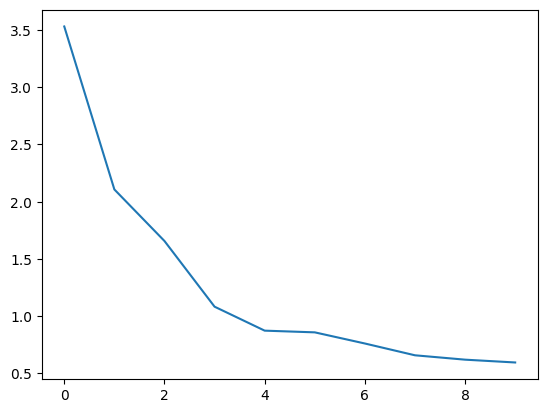

In [7]:
import pandas as pd

# convert the training history to a dataframe
history_df = pd.DataFrame(history.history)
# use Pandas native plot method
history_df['loss'].plot();

In [8]:
eval_result = model.evaluate(X_valid, y_valid) # Evaluar el modelo con los datos de validación para ver el error
print(f"Loss en datos de validación: {eval_result}")

15/15 [==============================] - 0s 1000us/step - loss: 0.5881
Loss en datos de validación: 0.5881483554840088


15/15 [==============================] - 0s 674us/step


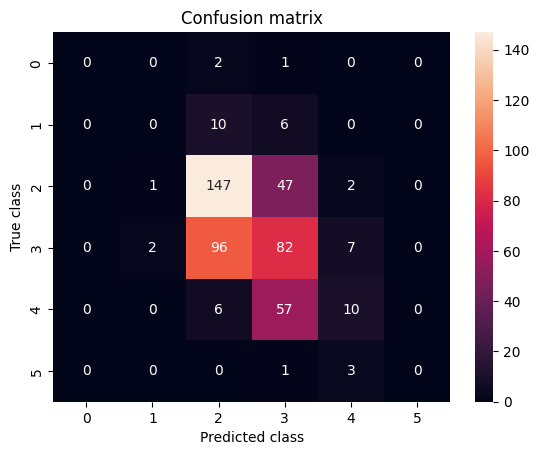

In [15]:
# Ver matriz de confusión
from sklearn.metrics import confusion_matrix
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

y_pred = model.predict(X_valid)
y_pred = np.round(y_pred)
cm = confusion_matrix(y_valid, y_pred)

plt.figure()
sns.heatmap(cm, annot=True, fmt="d")
plt.title('Confusion matrix')
plt.ylabel('True class')
plt.xlabel('Predicted class')
plt.show()